In [76]:
import sys

sys.path.append("../../../src/2d")

In [77]:
import matrix_element_sparse
import importlib
from scipy.sparse.linalg import cg
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.sparse.linalg import eigsh
import os

importlib.reload(matrix_element_sparse)
from matrix_element_sparse import *

In [78]:
m, n = 20, 20
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)

In [79]:
mel = Mel2d(x, y)
p, t, b = mel.generate_mesh()
K = mel.stiffness_matrix()
M = mel.mass_matrix()

In [80]:
# 行と列を削除する（例として2行目と2列目を削除）
K_dirichlet = mel.remove_row_col_csr(K, b, b)
M_dirichlet = mel.remove_row_col_csr(M, b, b)
val, vec = eigsh(K_dirichlet, 1, M_dirichlet, sigma=0, which="LM")

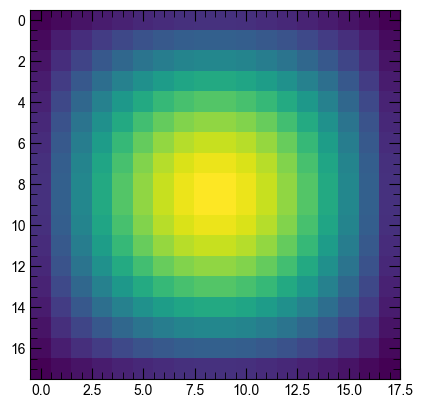

In [81]:
reduced_x_len = int(np.sqrt(K_dirichlet.shape[0]))
reduced_y_len = int(np.sqrt(K_dirichlet.shape[0]))
fig, ax = plt.subplots()
ax.imshow(vec.reshape(reduced_x_len, reduced_y_len))

In [82]:
fig = go.Figure(
    data=[
        go.Surface(
            x=x, y=y, z=vec.reshape(reduced_x_len, reduced_y_len), colorscale="Viridis"
        )
    ]
)
fig.update_layout(
    title="3D Surface Plot",
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
)
fig.show()
os.makedirs("figs", exist_ok=True)
fig.write_html("figs/surface_plot.html")
fig.write_image("figs/surface_plot.png")
fig.write_image("figs/surface_plot.pdf")

In [100]:
err = []
meshes = np.array([4, 5, 10, 15, 20, 40, 60, 80, 100])
for i in meshes:
    x = np.linspace(0, 1, i)
    y = np.linspace(0, 1, i)
    mel = Mel2d(x, y)
    p, t, b = mel.generate_mesh()
    K = mel.stiffness_matrix()
    M = mel.mass_matrix()
    K_dirichlet = mel.remove_row_col_csr(K, b, b)
    M_dirichlet = mel.remove_row_col_csr(M, b, b)
    val, vec = eigsh(K_dirichlet, 1, M_dirichlet, sigma=0, which="LM")
    err.append((val - 2 * np.pi**2) / (2 * np.pi**2))

In [101]:
err

[array([0.28557756]),
 array([0.15839374]),
 array([0.03062984]),
 array([0.01261726]),
 array([0.00684327]),
 array([0.00162269]),
 array([0.00070891]),
 array([0.00039538]),
 array([0.00025176])]

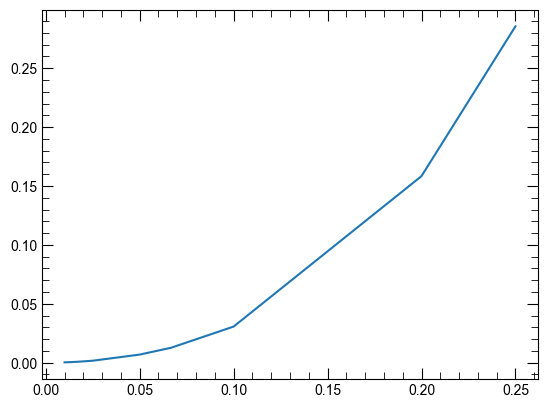

In [102]:
fig, ax = plt.subplots()
ax.plot(1 / meshes, err)

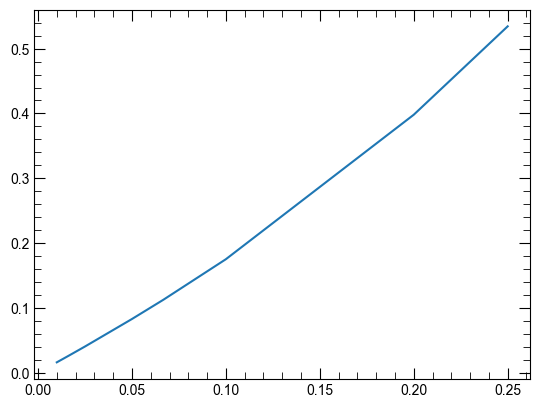

In [103]:
fig, ax = plt.subplots()
ax.plot(1 / meshes, np.sqrt(err))